<a href="https://colab.research.google.com/github/aaronhum/MAT494/blob/main/ch3-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 3 Calculus and Optimization
## 3.3 Unconstrained Optimization 
### 3.3.2.1 Convex Sets and Functions

#### Example
from https://www.askpython.com/python/examples/convex-hulls-in-python

In [9]:
import numpy as np
from sklearn.datasets import make_blobs
 
# center points for the clusters
centers = [[0, 1, 0], [1.5, 1.5, 1], [1, 1, 1],[1,1,3],[2,2,2]]
# standard deviations for the clusters
stds = [0.13, 0.12, 0.12,0.15,0.14]
 
# create dataset using make_blobs - assign centers, standard deviation and the number of points
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
point_indices = np.arange(1000)

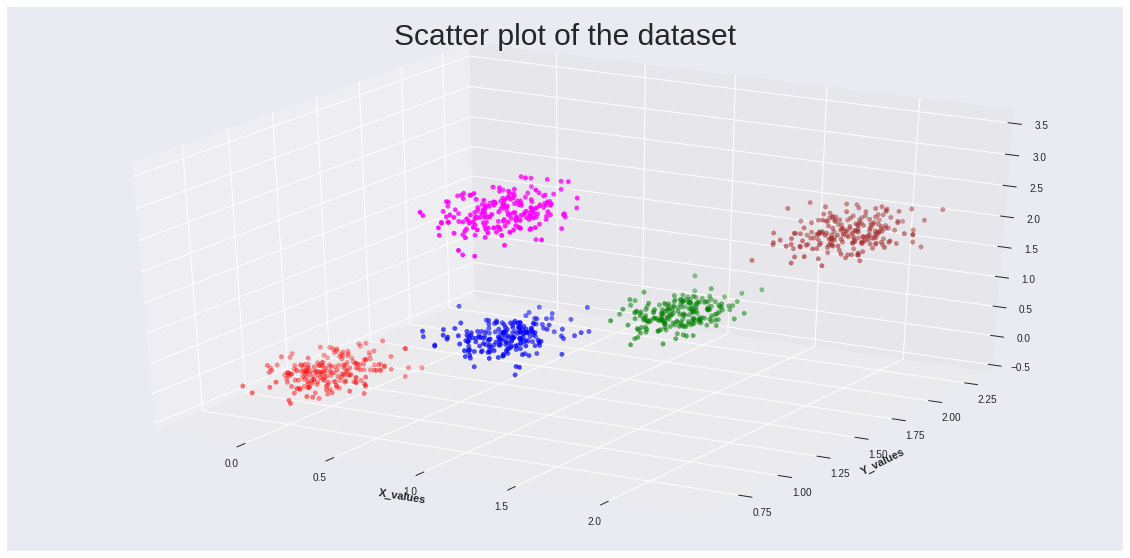

In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
 
x,y,z = X[:,0],X[:,1],X[:,2]
 
fig = plt.figure(figsize = (20,10),facecolor="w") 
ax = plt.axes(projection="3d") 
 
list_colours = ["red", "green", "blue","magenta","brown"]
cluster_colors = [list_colours[i] for i in labels_true]
 
scatter_plot = ax.scatter3D(x,y,z,c =cluster_colors,marker ='o')
plt.title("Scatter plot of the dataset",fontsize=30) 
ax.set_xlabel('X_values', fontweight ='bold')  
ax.set_ylabel('Y_values', fontweight ='bold') 
 
plt.show()

In [11]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
rng = np.random.default_rng()
hull = ConvexHull(X)

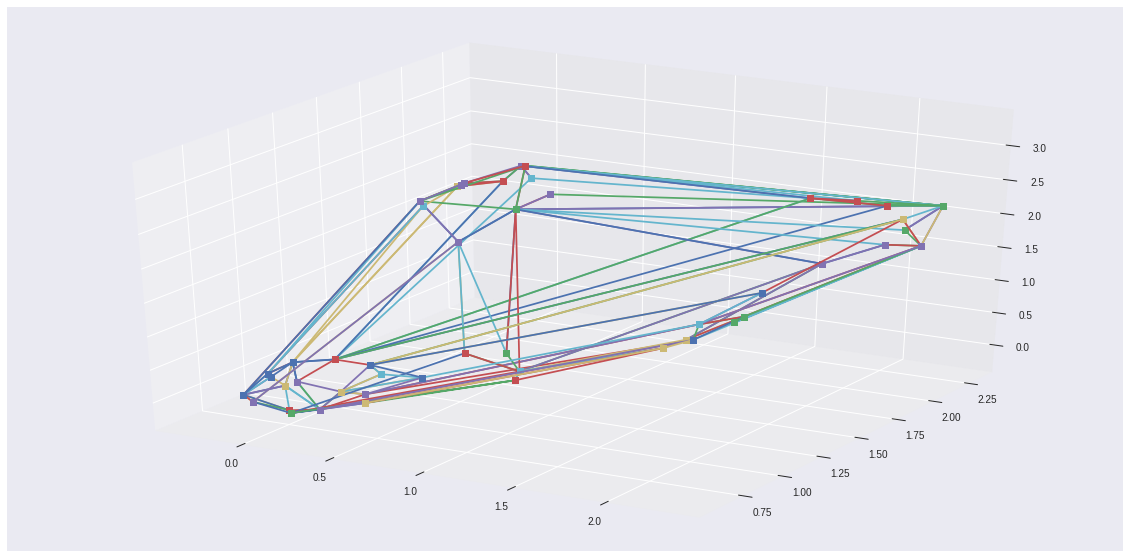

In [12]:
fig = plt.figure(figsize = (20,10),facecolor="w") 
ax = plt.axes(projection="3d") 
for simplex in hull.simplices:
    ax.plot3D(X[simplex, 0], X[simplex, 1],X[simplex, 2], 's-') 

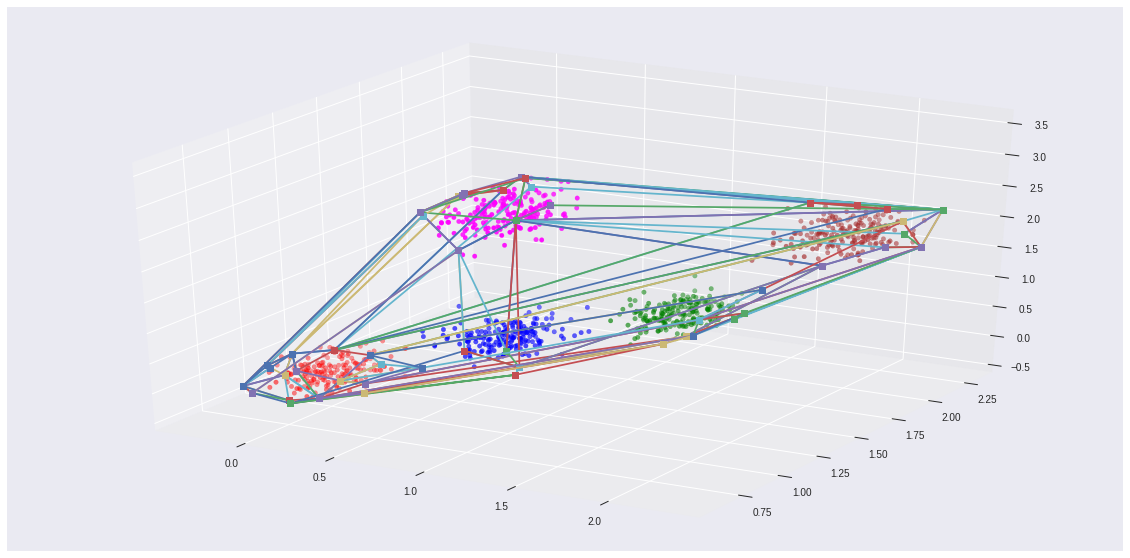

In [13]:
fig = plt.figure(figsize = (20,10),facecolor="w") 
ax = plt.axes(projection="3d") 
scatter_plot = ax.scatter3D(x,y,z,c =cluster_colors,marker ='o')
for simplex in hull.simplices:
    ax.plot3D(X[simplex, 0], X[simplex, 1],X[simplex, 2], 's-')

### 3.3.3 Gradient Descent

#### Example
from: https://medium.com/analytics-vidhya/if-we-have-any-function-and-we-want-find-the-extremum-of-that-function-whether-it-is-minima-or-3dd53d89ea40

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
height=[167,145,170,180,189,155,163,178,173,176]
weight=[83.5,72.5,85,90,94.5,77.5,81.5,89,86.5,88]
data=pd.DataFrame(list(zip(height,weight)),columns=["height","weight"])
x=data["height"]
y=data["weight"]
data

,height,weight
0,167,83.5
1,145,72.5
2,170,85.0
3,180,90.0
4,189,94.5
5,155,77.5
6,163,81.5
7,178,89.0
8,173,86.5
9,176,88.0


In [15]:
#cost function 
def single_point_cost(x,y,w):   
    y_pred= w * x
    cost=( y_pred - y) **2  #linear regression
    return cost

In [16]:
#grad function
def grad(x,y,w,):
    grad_w=2 * x * ((w * x) - y ) # derevative with respect to x
    return grad_w

In [17]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(x)):
        a=single_point_cost(x[i],y[i],w)
        cost+=a
    
    cost1=cost/len(x)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(x)):
        b=grad(x[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(x)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

In [18]:
w=0 # here we have  only one parameter
gamma=0.000001 #learning rate
all_costs=[]
for k in range(60):
    cost=0
    for i in range(len(x)):
        a=single_point_cost(x[i],y[i],w)
        cost+=a
    
    cost1=cost/len(x)  #average cost
    all_costs.append(cost1)
    grad_w=0
    for j in range(len(x)):
        b=grad(x[j],y[j],w)
        grad_w+=b
    grad_w1=grad_w/len(x)  #avearge grad
    w= w -  (gamma * grad_w1)  # in batch gradient descent update happens only one time

optimal value w is  0.4999999999999996


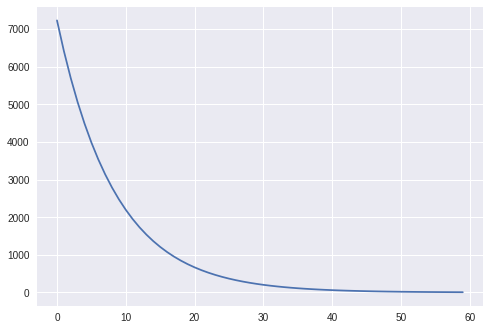

In [21]:
print("optimal value w is ",w) #optimal value of w
epochs=np.arange(60)
plt.plot(epochs,all_costs)

In [19]:
all_costs23=[]
w=0
gamma=0.000001
for k in range(60):
    for i in range(len(x)):
        cost21=single_point_cost(x[i],y[i],w)
        grad_w21=grad(x[i],y[i],w)
        w= w- (gamma * grad_w21) # in sgd update takes place after every point
    all_costs23.append(cost21)

optimal value w is  0.4999999999999996


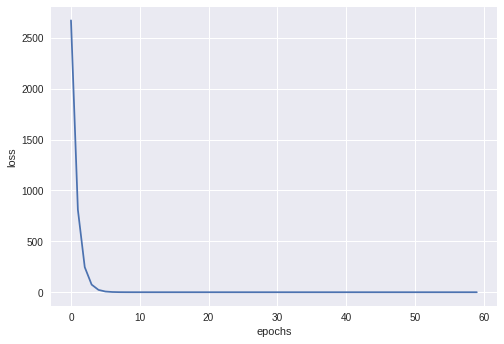

In [22]:
print("optimal value w is ",w) #optimal value of w
plt.xlabel("epochs")
plt.ylabel("loss")
plt.plot(epochs,all_costs23)